# Speech Processing Lab 3

Rishabh Tripathi (180030036)


## **Aim**
* To identify optimal sampling frequency for speech signal processing.
* To identify optimal bit resolution for speech signal processing.
* To understand the significance of telephone bandwidth.
* To understand the difference between narrowband and wideband speech.


## **Theory**

The sampling of analog signal is based on sampling theorem. The sampling theorem states that if fm is the maximum frequency component in the analog signal, then the information present in the signal can be represented by its sampled version provided the number samples taken per second is greater than or equal to twice the maximum frequency component. The number of samples/second is more commonly termed as sampling frequency fs. According to sampling theorem, fs should be greater than or equal to 2 fm.

The speech signal has frequency components in the audio frequency range (20 Hz to 20 kHz). The standard sampling frequency to sample the entire audio range is 44.1 kHz. This is because, 20 kHz is the maximum frequency component and allowing some guard band, the sampling frequency has been set at 44.1 kHz.

Here we try to figure out what disadvantages it has to reduce the sampling frequency in order to reduce the compute power required to process speech signals. We wil try to find an optimal frequency for general purpose of speech processing. 

In [ ]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Problem A**

1. Record the word **‘Speech’** using a sampling frequency of **44.1kHz** save it in a .wav file. Plot the complete speech signal and the frequency spectrum for different sounds.
2. Resample the above speech signal to **16kHz** and plot the complete speech signal along with the frequency spectra for different sounds. Comment on the intelligibility of the speech signal sampled at 16kHz as compared to the speech signal sampled at 44.1kHz and whether this is a good choice for the sampling frequency.
3. Resample the speech signal obtained from (1) to **8kHz** and plot the complete speech signal along with the frequency spectra for different sounds. Comment on the intelligibility of the speech signal sampled at 8kHz comparing it to the above signals and whether this is a good choice for the sampling frequency.
4. Resample the speech signal obtained from (1) to **4kHz** and plot the complete speech signal along with the frequency spectra for different sounds. Comment on the intelligibility of the speech signal sampled at 4kHz comparing it to the above signals and whether this is a good choice for the sampling frequency.


### **Procedure**
1. Record the word **'Speech'** using WaveSurfer with sampling frequency of **44100 Hz** and save it as a .wav file.
2. Using WaveSurfer find the time stamps for different sounds. Here we take the following sounds:
    * ss
    * ee
    * ch
3. Define a function for extracting different sounds and another for plotting the magnitude spectrum as we will use them multiple times.
4. Load the audio file using Librosa library using different sampling frequencies (44100 Hz, 16000 Hz, 8000 Hz, 4000 Hz) as required. 
5. Plot the waveform of the entire signal using matplotlib and the magnitude spectrum for each sound (using the defined functions) in case of every sampling frequency. 

In [ ]:
%cd drive/MyDrive/Speech\ Processing\ Lab/Lab\ 3

/content/drive/MyDrive/Speech Processing Lab/Lab 3


In [ ]:
!ls

speech_16b.wav	speech_1b.wav  speech_4k.wav  speech_8k.wav
speech_16k.wav	speech_4b.wav  speech_8b.wav  speech.wav


In [ ]:
# Using WaveSurfer the time stamps of each of the following
# speech sounds has been recorded:

# ss => 0.134s - 0.272s
# ee => 0.487s - 0.773s
# ch => 1.011s - 1.172s

# Function to extract each sound in different variables
def extract_sounds(audio):
    ss = audio[int(0.134*fs):int(0.272*fs)]
    ee = audio[int(0.487*fs):int(0.773*fs)]
    ch = audio[int(1.011*fs):int(1.172*fs)]
    return ss, ee, ch

In [ ]:
def plot_spectrum(sound, sound_name):
    
    # Getting the Discrete Fourier Transform of the sound
    total_len = sound.shape[0]
    audio_fft = fft(sound)/total_len

    f_array = fftfreq(total_len, 1/fs)
    
    plt.figure(figsize=(10,5))
    plt.plot(f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2]))
    plt.title("Magnitude Spectrum of "+ "/" + sound_name + "/")
    plt.yscale('log')
    plt.xlim((0, 15000))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()


In [ ]:
audio, fs = librosa.load("speech.wav", sr = 44100)
t = np.arange(0, audio.shape[0]/fs, 1/fs)

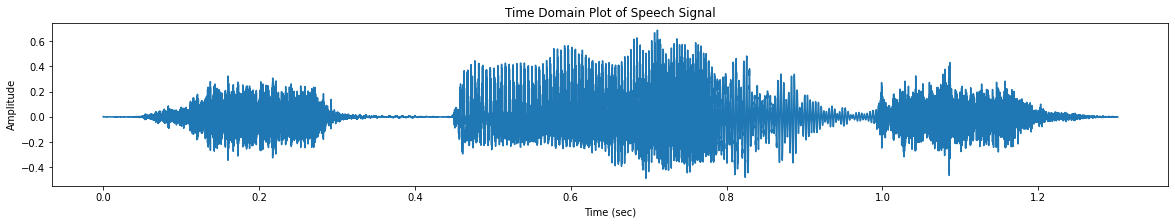

In [ ]:
# plotting the waveform of complete speech signal
plt.figure(figsize=(20,3))
plt.plot(t, audio)
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

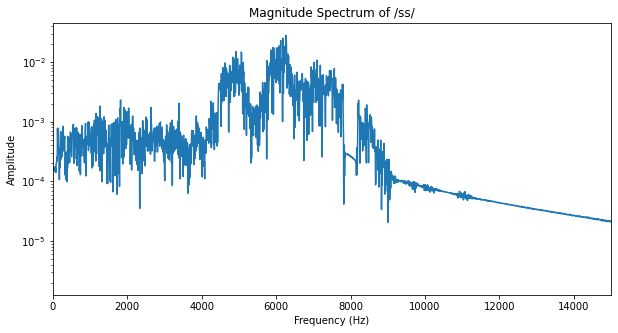

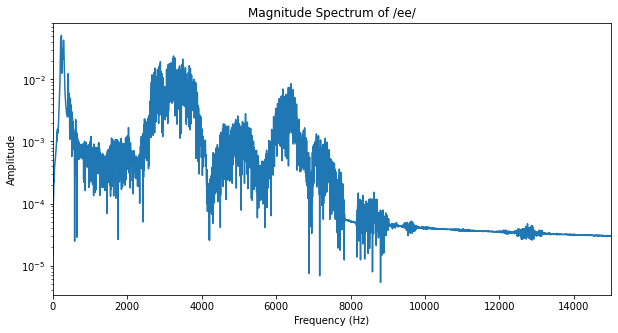

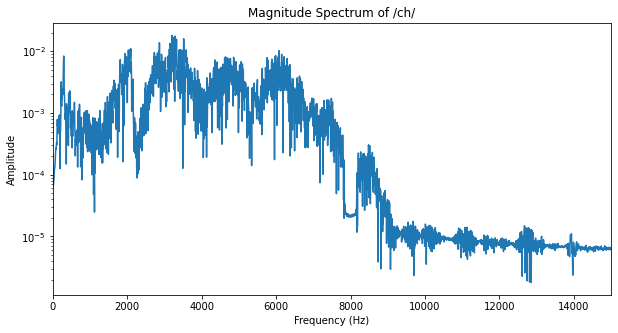

In [ ]:
ss, ee, ch = extract_sounds(audio)
plot_spectrum(ss, 'ss')
plot_spectrum(ee, 'ee')
plot_spectrum(ch, 'ch')

**Resampling at 16 kHz**

* We observe that using this sampling frequency we can capture upto 8 kHz of the signal frequency of the sound (consitent with the Nyquist-Shannon sampling theorem).
* The sound remains intelligible to human ears. 
* It is a good choice because in general speech signal we do not have much energy above 8 kHz frequency (which is observable in the plots below). 

In [ ]:
# Resampling the speech signal to 16kHz
audio, fs = librosa.load("speech.wav", sr = 16000)
t = np.arange(0, audio.shape[0]/fs, 1/fs)

# saving the resampled signal
sf.write('speech_16k.wav', audio, fs)

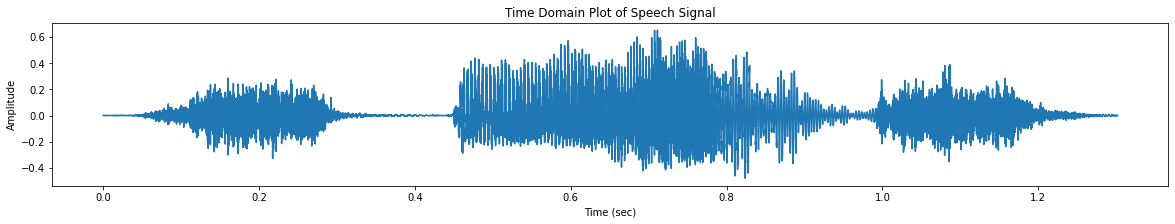

In [ ]:
# plotting the waveform of complete speech signal
plt.figure(figsize=(20,3))
plt.plot(t, audio)
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

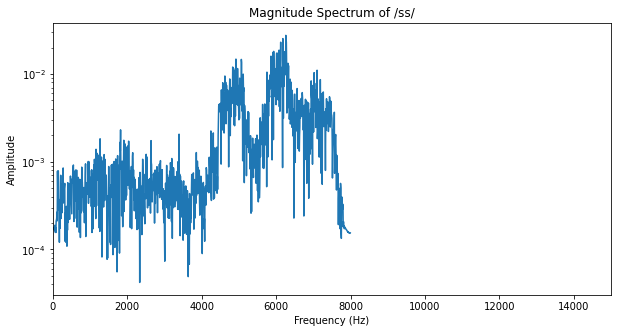

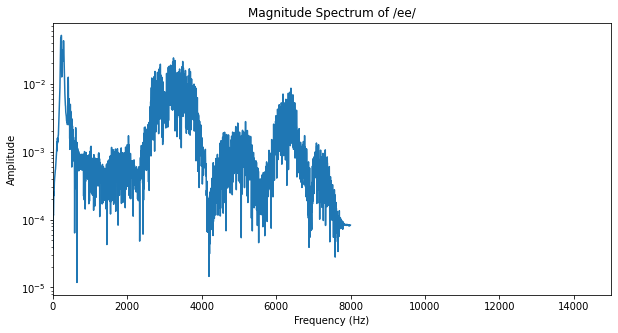

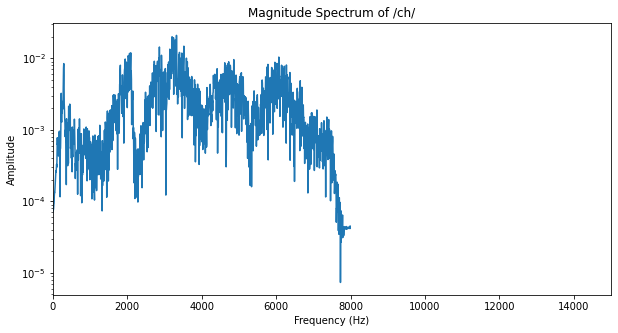

In [ ]:
# plotting frequency spectra of different sounds
ss, ee, ch = extract_sounds(audio)
plot_spectrum(ss, 'ss')
plot_spectrum(ee, 'ee')
plot_spectrum(ch, 'ch')

**Resampling at 8 kHz**

* We observe that using this sampling frequency we can capture upto 4 kHz of the signal frequency of the sound (consitent with the Nyquist-Shannon sampling theorem).
* The speech signal loses the high frequency components which attenuates the "ss" sound (observable in the waveform below), and so it sounds more like "peech" to human ears. 
* It is still a good choice because we can comprehend the speech to some extent. 

In [ ]:
# Resampling the speech signal to 8kHz
audio, fs = librosa.load("speech.wav", sr = 8000)
t = np.arange(0, audio.shape[0]/fs, 1/fs)

# saving the resampled signal
sf.write('speech_8k.wav', audio, fs)

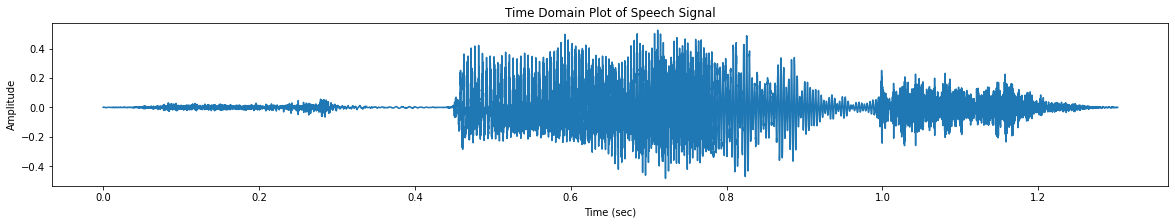

In [ ]:
# plotting the waveform of complete speech signal
plt.figure(figsize=(20,3))
plt.plot(t, audio)
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

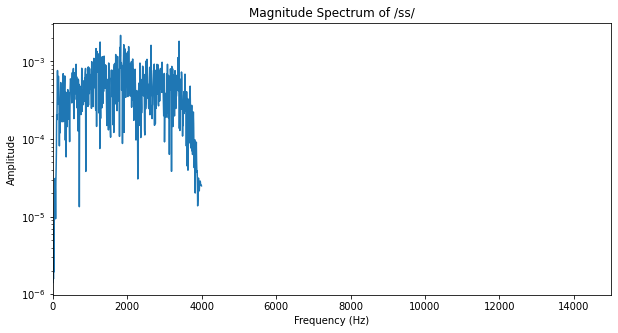

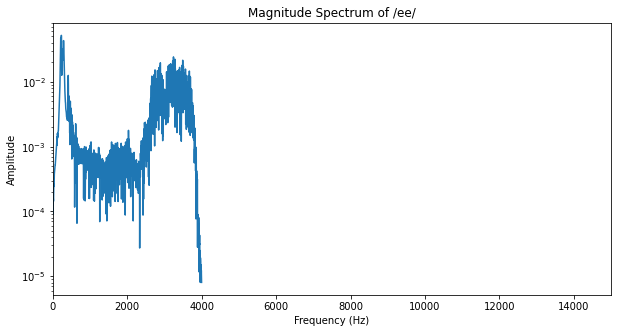

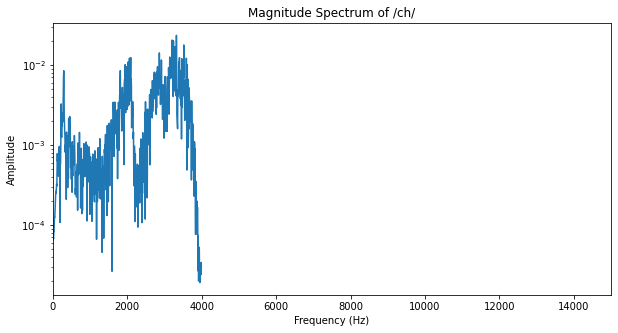

In [ ]:
# plotting frequency spectra of different sounds
ss, ee, ch = extract_sounds(audio)
plot_spectrum(ss, 'ss')
plot_spectrum(ee, 'ee')
plot_spectrum(ch, 'ch')

**Resampling at 4 kHz**

* We observe that using this sampling frequency we can capture upto 2 kHz of the signal frequency of the sound (consitent with the Nyquist-Shannon sampling theorem).
* The speech signal loses the high frequency components of "ss" sound as well as the overtones of "ee" sound (observable in the spectra below), and so it sounds muffled overall. 
* It may not be a good choice for sampling frequency. 

In [ ]:
# Resampling the speech signal to 4kHz
audio, fs = librosa.load("speech.wav", sr = 4000)
t = np.arange(0, audio.shape[0]/fs, 1/fs)

# saving the resampled signal
sf.write('speech_4k.wav', audio, fs)

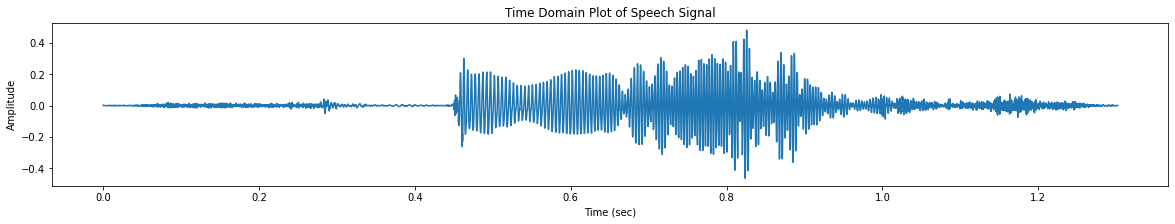

In [ ]:
# plotting the waveform of complete speech signal
plt.figure(figsize=(20,3))
plt.plot(t, audio)
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

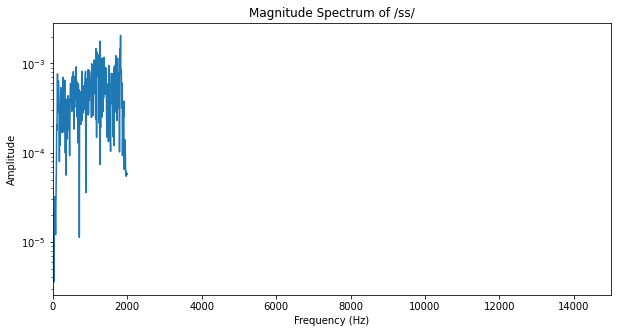

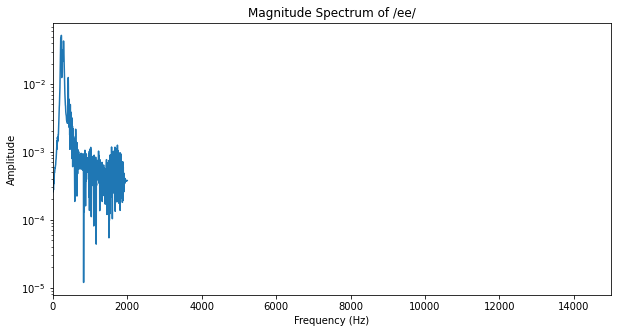

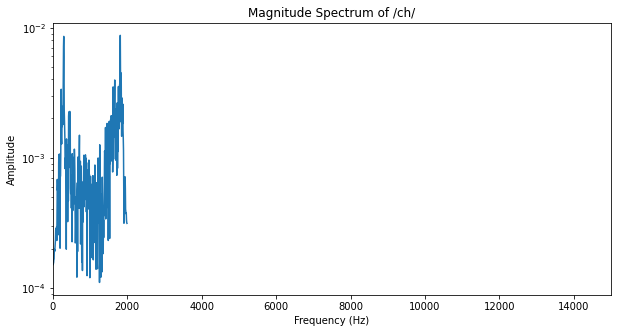

In [ ]:
# plotting frequency spectra of different sounds
ss, ee, ch = extract_sounds(audio)
plot_spectrum(ss, 'ss')
plot_spectrum(ee, 'ee')
plot_spectrum(ch, 'ch')

## **Theory**

After the sampling frequency, the next important parameter in the digitization process of speech is bit resolution. The number of bits used for storing each sample of speech is termed as bit resolution. The number of bits/sample in turn depends on the number of quantization levels used during analog to digital conversion. More the number of quantization levels, finer will be the quantization step and hence better will be the information preserved in the digitized form. However, more will be the requirement of number of bits/sample. Hence it is a trade off between the number of bits and information representation.

Here we try to vary the bit resolution an audio signal sampled at 16 kHz. We observe what changes occur in the quality of the sound and then decide what is the optimal bit resolution for speech processing. 

## **Problem B**

* For this study, record the word **‘Speech’** using a sampling frequency of 16kHz and a bit resolution of **16 bits/sample.** Plot the complete speech signal and the frequency spectrum of different sounds using the bit resolution of 16 bits/sample.
* Now, using the same speech signal sampled at 16kHz, now use a bit resolution of **8 bits/sample.** Plot the complete speech signal and the frequency spectrum of different sounds.  Comment on the frequency spectrum of the different sounds, intelligibility and quality of the speech signal comparing it with the above speech signal obtained using 16 bits/sample.
* Using the same speech signal sampled at 16kHz, now use a bit resolution of **4 bits/sample.** Plot the complete speech signal and the frequency spectrum of different sounds.  Comment on the frequency spectrum of the different sounds, intelligibility and quality of the speech signal comparing it with the above speech signals.
* Using the same speech signal sampled at 16kHz, now use a bit resolution of **1 bit/sample.** Plot the complete speech signal and the frequency spectrum of different sounds.  Comment on the frequency spectrum of the different sounds, intelligibility and quality of the speech signal comparing it with the above speech signals.

### **Procedure**
1. Record the word **'Speech'** using WaveSurfer with sampling frequency of **16000 Hz** and save it as a .wav file.
2. We use the same time stamps as found above to extract sounds from the speech signal.
3. Define a function to adjust the bit resolution to n-bits (n>1).
4. Load the audio file using Librosa library using a sampling frequency of 16 kHz.
6. Adjust the bit-resolution of the loaded audio signal to required values, i.e., 16, 8, 4, or 1 bit/sample using the above define function.
5. Plot the waveform of the entire signal using matplotlib and the magnitude spectrum for each sound (using the defined functions) in case of every bit-resolution.

In [ ]:
# Function to reset the bit resolution of a signal to n bits
def bit_resolution(audio, n=16):

    max_val = np.max(np.abs(audio))
    audio1 = audio/max_val
    audio1 *= 2**(n-1)
    audio1 = np.around(audio1)
    audio1 /= 2**(n-1)
    audio1 *= max_val
    return audio1

In [ ]:
# loading the speech signal at 16kHz
audio, fs = librosa.load("speech.wav", sr = 16000)
t = np.arange(0, audio.shape[0]/fs, 1/fs)

# ensuring a bit resolution of 16 bits/sample
audio16 = bit_resolution(audio, 16)

# saving the speech signal
sf.write('speech_16b.wav', audio16, fs)

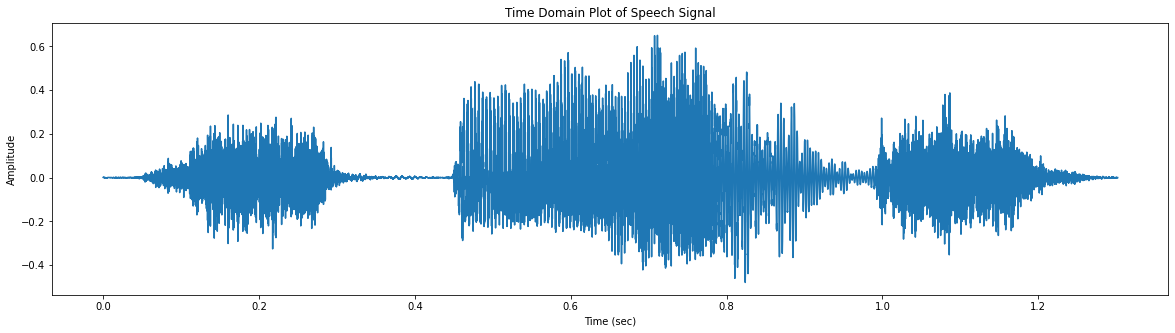

In [ ]:
# plotting the waveform of complete speech signal
plt.figure(figsize=(20,5))
plt.plot(t, audio16)
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

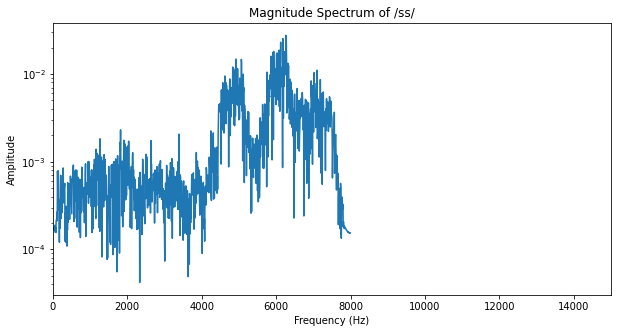

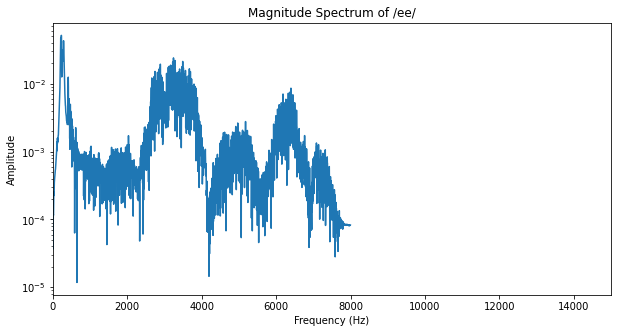

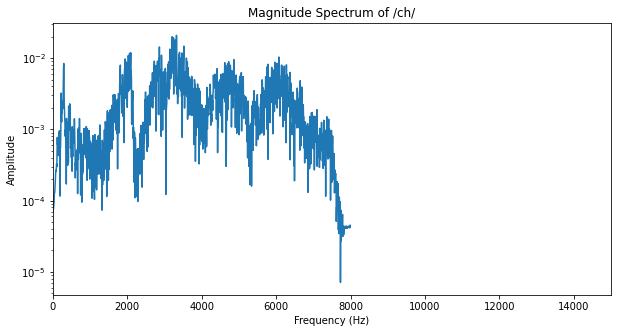

In [ ]:
# plotting frequency spectra of different sounds
ss, ee, ch = extract_sounds(audio16)
plot_spectrum(ss, 'ss')
plot_spectrum(ee, 'ee')
plot_spectrum(ch, 'ch')

**Bit resolution = 8 bits/sample**

* As observed in the below spectra plots, 8 bits/sample is a good enough bit resolution as no information seems to be lost. The magnitude spectra of different sounds look similar to the original 16 bits/sample signal.
* The sound is easily comprehensible to the human ears. 
* As observable in the plots below, there is hardly any difference in the quality of sound (as perceived to human ears) as compared to the 16 bits/sample signal.

In [ ]:
# setting the bit resolution to 8 bits/sample
audio8 = bit_resolution(audio, 8)

# saving the speech signal
sf.write('speech_8b.wav', audio8, fs)

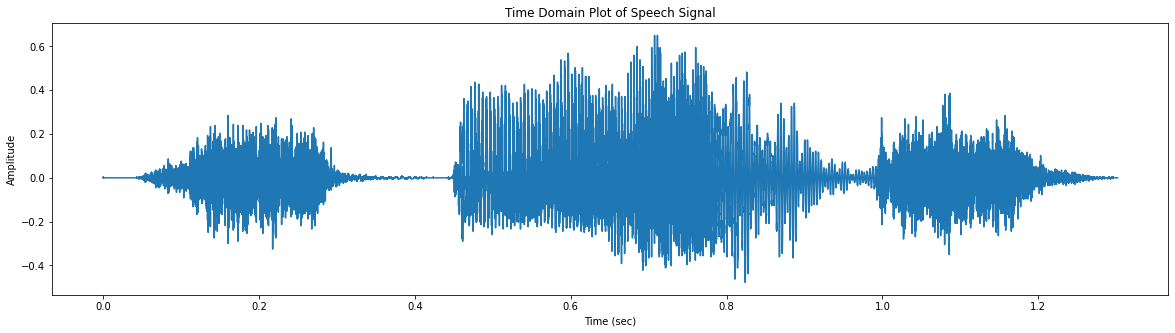

In [ ]:
# plotting the waveform of complete speech signal
plt.figure(figsize=(20,5))
plt.plot(t, audio8)
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

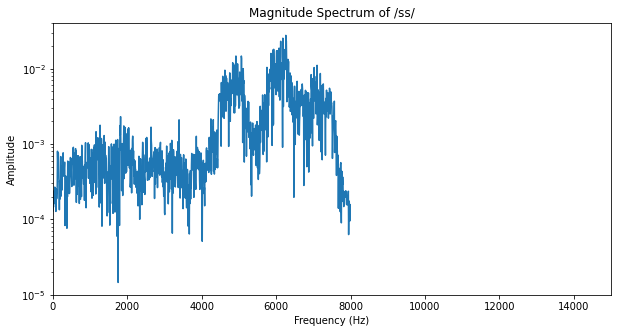

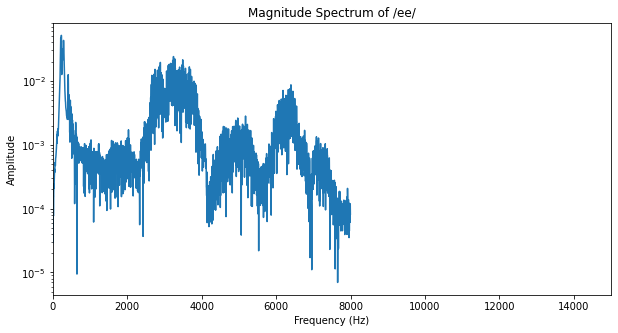

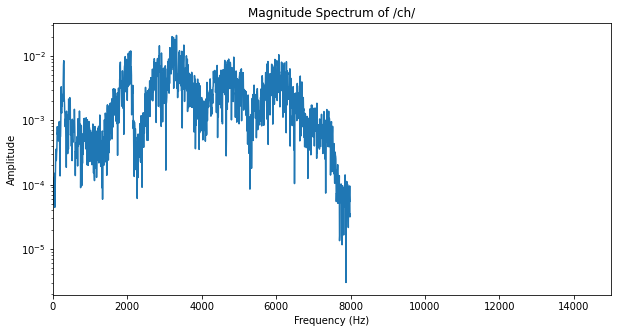

In [ ]:
# plotting frequency spectra of different sounds
ss, ee, ch = extract_sounds(audio8)
plot_spectrum(ss, 'ss')
plot_spectrum(ee, 'ee')
plot_spectrum(ch, 'ch')

**Bit resolution = 4 bits/sample**

* As observed in the below magnitude spectra of different sounds, the high frequency component of "ss" sound gets attenuated. The spectra for "ee" and "ch" almost remains the same as above.
* The sound is comprehensible to the human ears. 
* As observable in the plots below, the waveform is quite different from the above signals. The sound quality is lower as compared to 16 bits/sample singal, so we hear some noise along with the original sound.

In [ ]:
# setting the bit resolution to 4 bits/sample
audio4 = bit_resolution(audio, 4)

# saving the speech signal
sf.write('speech_4b.wav', audio4, fs)

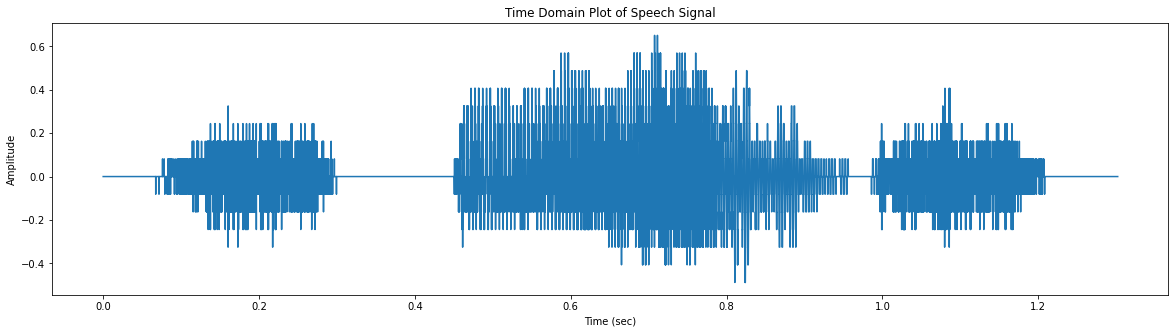

In [ ]:
# plotting the waveform of complete speech signal
plt.figure(figsize=(20,5))
plt.plot(t, audio4)
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

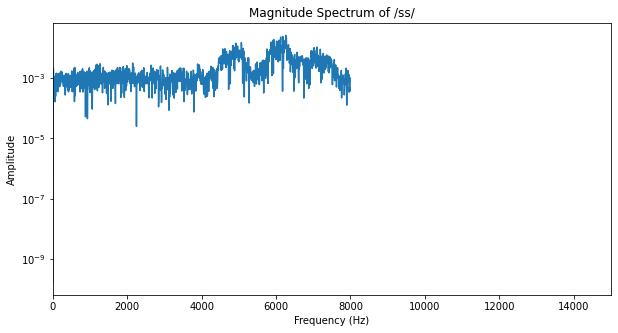

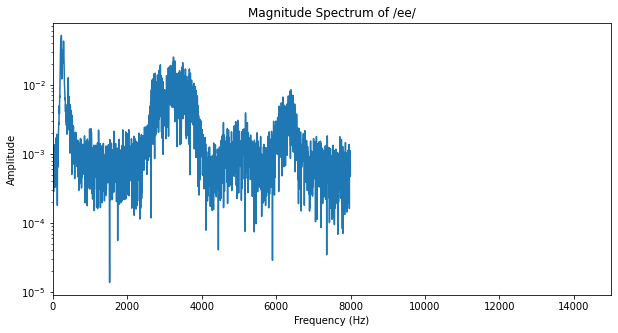

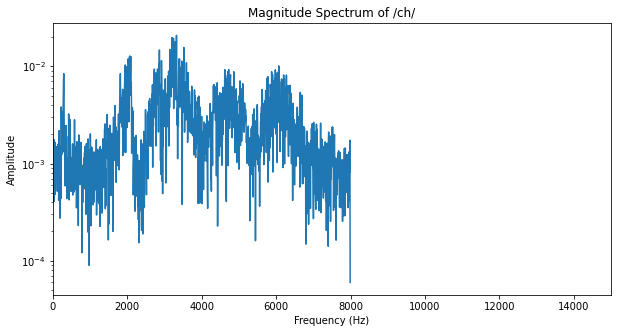

In [ ]:
# plotting frequency spectra of different sounds
ss, ee, ch = extract_sounds(audio4)
plot_spectrum(ss, 'ss')
plot_spectrum(ee, 'ee')
plot_spectrum(ch, 'ch')

**Bit resolution = 1 bit/sample**

* As observed in the below magnitude spectra of different sounds, the amplitude over the entire frequency band increases for every sound. We still observe that "ss" sound has more energy in the higher frequency (around 6 kHz), the "ee" sound has more energy in low frequency (below 1 kHz) and, for all 3 sounds the difference between the amplitudes of the high energy and low energy region has decreased. 
* The sound is very noisy, but surprisingly we can still understand the sounds to some extent. 
* As observable in the plots below, the waveform has either an amplitude of 0 or 1, so the amplitude information is lost. The quality of sound reduces significantly because of this. Although the frequency information is still present to some extent.

In [ ]:
# setting the bit resolution to 1 bit/sample
bins = np.array([0., 1.])
audio1 = bins[np.digitize(audio, bins)]

# saving the speech signal
sf.write('speech_1b.wav', audio1, fs)

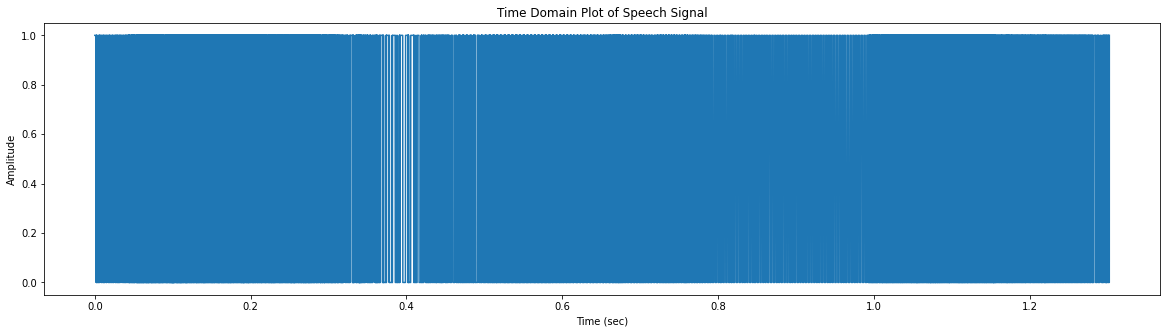

In [ ]:
# plotting the waveform of complete speech signal
plt.figure(figsize=(20,5))
plt.plot(t, audio1)
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

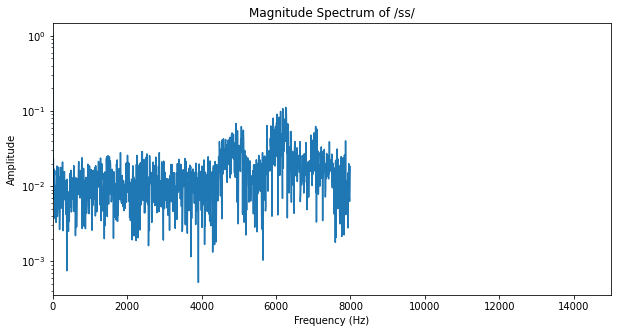

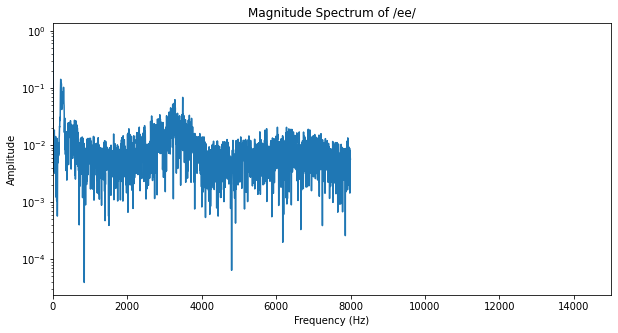

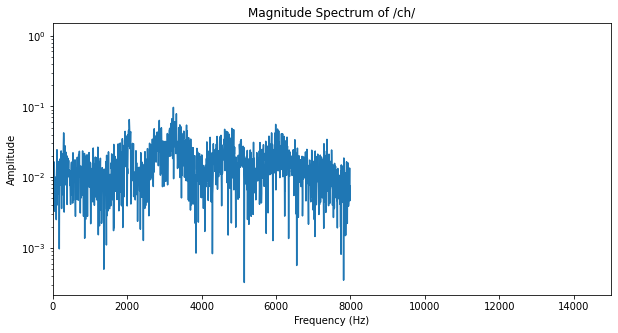

In [ ]:
# plotting frequency spectra of different sounds
ss, ee, ch = extract_sounds(audio1)
plot_spectrum(ss, 'ss')
plot_spectrum(ee, 'ee')
plot_spectrum(ch, 'ch')

## **Inference**

1. We conclude that **16 kHz** is the optimum sampling frequency for general purpose speech processing (Wideband speech). 
2. We can use the sampling frequency of **8 kHz** where absolutely necessary as it can retain a majority of the information (Narrowband speech).
3. To preserve bandwidth in telephone communication we pass the speech signal through an anti-aliasing low pass filter with cutoff frequency of 3.3 kHz and sample it at 8 kHz sampling frequency (Telephone bandwidth speech).
3. The preffered bit resolution is **16 bits/sample** as it retains most of the information. The resolution of 1 bit/sample is the worst in retaining information.
4. We can also use **8 bits/sample** in cases where we have limited storage capacity as it retains enough information for speech to be easily comprehensible. 